In [2]:
import pandas as pd
df=pd.read_csv("houses.csv", header=-1,names=['Transaction_unique_identifier','Price','Date of Transfer','Postcode','Property Type','Old/New','Duration','PAON','SAON','Street','Locality','Town/City','District','County','PPDCategory Type','Record Status - monthly file only'])
df.head()

,Transaction_unique_identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


In [3]:
df['Price'].describe()

count    1.000000e+05
mean     1.743868e+05
std      3.514634e+05
min      1.500000e+02
25%      7.400000e+04
50%      1.290000e+05
75%      2.070000e+05
max      4.846572e+07
Name: Price, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

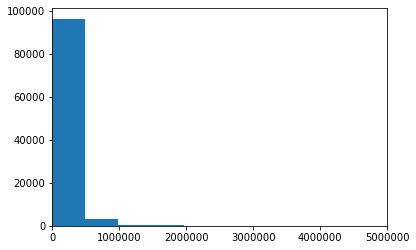

In [6]:
import numpy as np
b=np.linspace(1.500000e+02,4.846572e+07,100)
a=df['Price']
plt.xlim(0,5000000) 
plt.hist(a,b)

plt.show()


In [36]:
# the above graph shown shows bars even at 5000000 but that can be seen nly when we use plt.ylim() and set it lower but then the main data will be not be shown correct so I choose this axis.

In [8]:
y=df[df['County'].str.contains('LONDON')]
x=df[df['County'].str.find("LONDON")==-1]
u=x['Price']
t=y['Price']

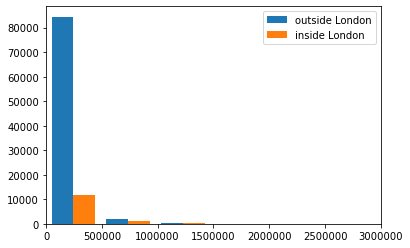

In [9]:
plt.xlim(0,3000000)
plt.hist([u,t],b,label=['outside London','inside London'])
plt.legend(loc='upper right')
plt.show()

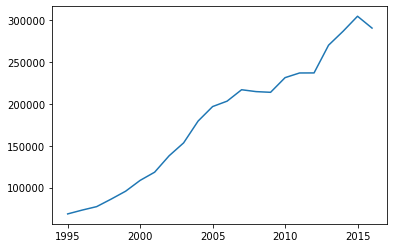

In [12]:
k=df.loc[:,'Price':'Date of Transfer']
new=k['Date of Transfer'].str.split('-',1,expand=True)
k['Year']=new[0]
k['date']=new[1]
k.drop(columns='Date of Transfer',inplace=True)
k.head()
i=[]
for f in range(1995,2017):
    i.append(f)
plt.plot(i,k.groupby('Year')['Price'].mean())
plt.show()